<a href="https://colab.research.google.com/github/Jair-RM/Ingenieria-Financiera/blob/main/Proyecto_Keras_(load_digits).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Qué es load_digits?

Es un conjunto de imágenes de dígitos escritos a mano (del 0 al 9), donde cada imagen es de tamaño 8x8 píxeles (64 características en total por imagen).

# Ejemplo completo con red neuronal:

Aquí va un ejemplo usando MLPClassifier (una red neuronal multicapa de Scikit-learn):

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar los datos
X, y = load_digits(return_X_y=True)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear red neuronal
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

# Entrenar
mlp.fit(X_train, y_train)

# Predecir
y_pred = mlp.predict(X_test)

# Evaluar
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  1  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  1  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 63  2  0  0  1]
 [ 1  0  0  0  0  1 51  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  1  0  0  0  0  0 39  1]
 [ 0  0  0  1  0  0  0  0  1 57]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.96      0.98      0.97        50
           2       0.98      1.00      0.99        47
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        60
           5       0.97      0.95      0.96        66
           6       0.96      0.96      0.96        53
           7       1.00      0.98      0.99        55
           8       0.93      0.91      0.92        43
           9       0.95      0.97      0.96        59

    accuracy                           0.97       540
   macro avg       

Vamos a adaptar el uso del dataset load_digits para usarlo con Keras (TensorFlow) y además vamos a visualizar algunas imágenes del conjunto de datos y cómo funciona la red.

# ✅ Paso 1: Cargar y visualizar los datos

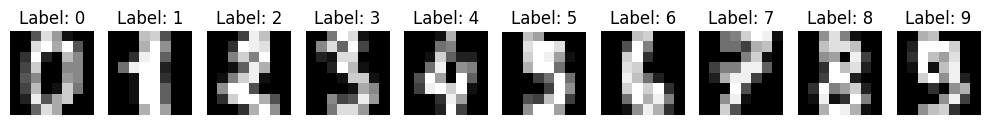

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Cargar el dataset
digits = load_digits()
X = digits.images  # imágenes 8x8
y = digits.target  # etiquetas (dígitos del 0 al 9)

# Mostrar los primeros 10 dígitos
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# ✅ Paso 2: Preparar los datos para Keras

Keras espera que los datos estén en forma de matrices 2D o 3D (para imágenes).

* Convertimos las imágenes 8x8 a matrices de entrada.

* También convertimos las etiquetas a one-hot encoding.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Normalizar valores (0-16) a (0-1)
X = X / 16.0

# Cambiar forma a (n_samples, 8, 8, 1) para usar CNN o (n_samples, 64) para MLP
X = X.reshape((X.shape[0], -1))  # MLP: 64 entradas

# One-hot encoding de las etiquetas
y_cat = to_categorical(y, num_classes=10)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

# ✅ Paso 3: Crear y entrenar la red neuronal con Keras

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir la red
model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # 10 clases (0-9)
])

# Compilar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2477 - loss: 2.2083 - val_accuracy: 0.4841 - val_loss: 1.9475
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6501 - loss: 1.7953 - val_accuracy: 0.8413 - val_loss: 1.4147
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8255 - loss: 1.2554 - val_accuracy: 0.8452 - val_loss: 0.8842
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8813 - loss: 0.7918 - val_accuracy: 0.8770 - val_loss: 0.5912
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9138 - loss: 0.5227 - val_accuracy: 0.8889 - val_loss: 0.4432
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9286 - loss: 0.3706 - val_accuracy: 0.9206 - val_loss: 0.3494
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9450 - loss: 0.3033 - val_accuracy: 0.9206 - val_loss: 0.3033
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9630 - loss: 0.2247 - val_accuracy: 0.9325 - val_loss

# ✅ Paso 4: Graficar el entrenamiento

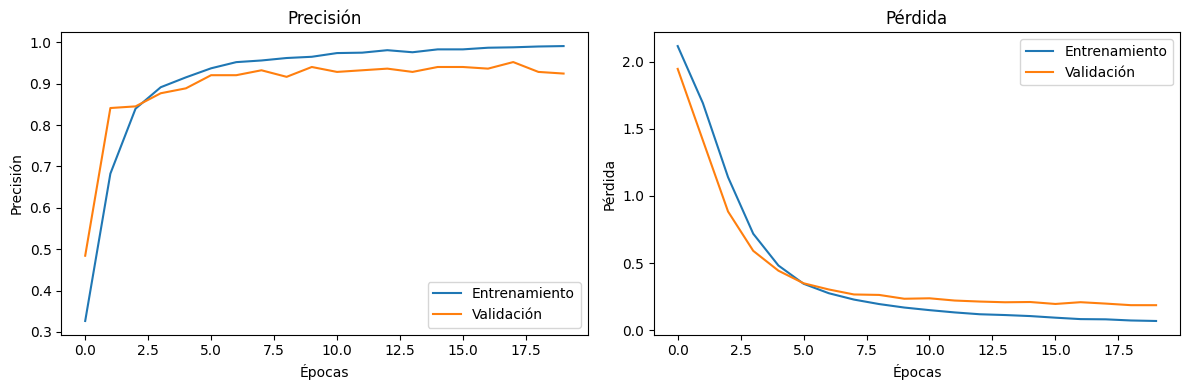

In [5]:
# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ Paso 5: Evaluar el modelo

In [7]:
# Evaluar en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisión en datos de prueba: {test_acc:.4f}')

Precisión en datos de prueba: 0.9648


Mostrar las predicciones visualmente con colores es una excelente forma de ver cómo está funcionando tu red neuronal. Vamos a graficar algunas imágenes del conjunto de prueba junto con:

* Su etiqueta real

* Su predicción

Y usaremos colores para resaltar si la predicción fue correcta (verde) o incorrecta (rojo)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


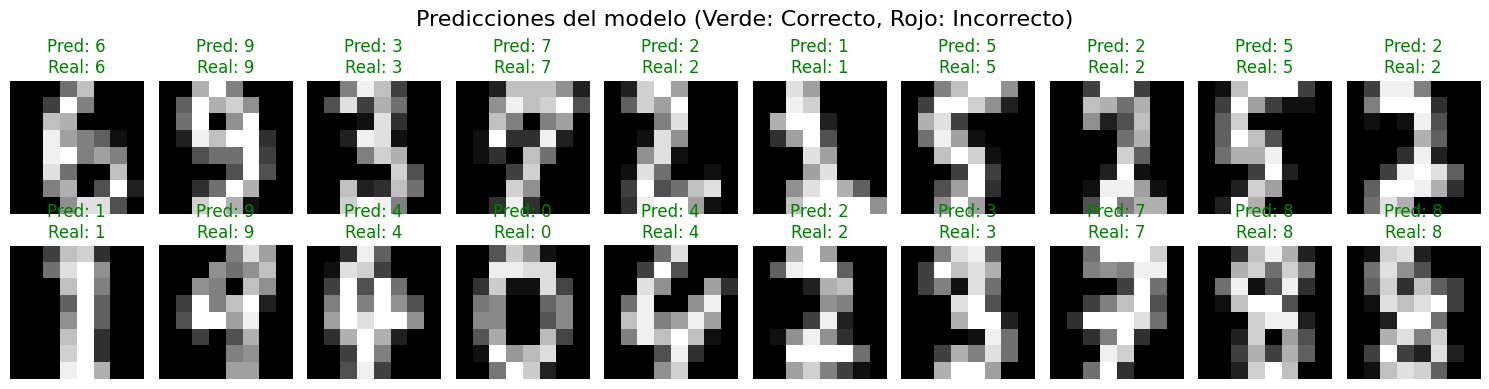

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Primero, reestructuramos las imágenes para graficarlas
X_test_imgs = X_test.reshape(-1, 8, 8)  # Volvemos a 8x8 para visualizar

# Realizamos predicciones
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Mostrar primeras 20 imágenes con predicción y color
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
fig.suptitle('Predicciones del modelo (Verde: Correcto, Rojo: Incorrecto)', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_imgs[i], cmap='gray')
    pred_label = y_pred_labels[i]
    true_label = y_true_labels[i]

    # Título con color
    color = 'green' if pred_label == true_label else 'red'
    ax.set_title(f'Pred: {pred_label}\nReal: {true_label}', color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()

La **matriz de confusión visual** es una herramienta para evaluar el rendimiento de un modelo de clasificación, como tu red neuronal. Es como una tabla que compara las etiquetas reales con las predicciones del modelo, y se puede mostrar como una imagen de calor (heatmap) para que sea más fácil de entender visualmente.



¿Cómo se lee?

Supongamos que tienes 10 clases (los dígitos del 0 al 9):

* Las filas son las clases reales (etiquetas verdaderas).

* Las columnas son las clases predichas por el modelo.

* Cada celda muestra cuántas veces el modelo predijo cierta clase cuando en realidad era otra.

Si el modelo fuera perfecto, solo verías valores grandes en la diagonal principal (de arriba a la izquierda hacia abajo a la derecha).


¿Para qué sirve?

Te permite ver qué clases se confunden entre sí. Por ejemplo, si tu modelo confunde el 8 con el 3, lo verás claramente.

Puedes usarla para decidir si necesitas más datos, ajustar la red, o cambiar la arquitectura.

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


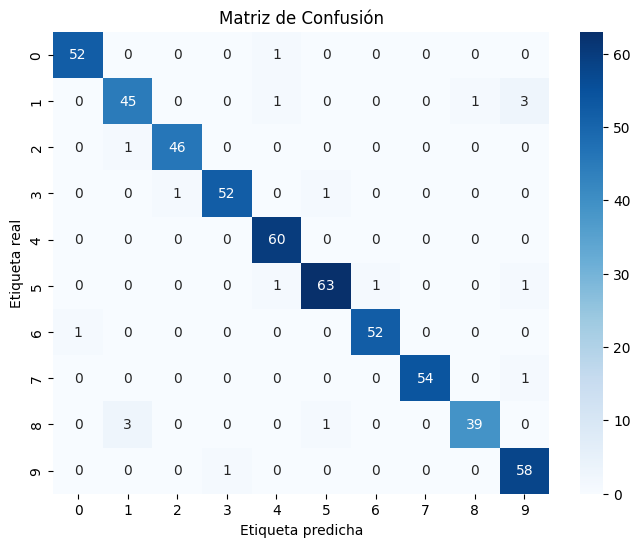

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener etiquetas reales y predichas
y_true = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(model.predict(X_test), axis=1)

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')
plt.title('Matriz de Confusión')
plt.show()

¿Cómo interpretar esta tabla?

1. Diagonal principal = aciertos

* * Por ejemplo, la celda (9,9) tiene 58 → eso significa que 58 imágenes que eran un 9 fueron predichas correctamente como 9.

2. Fuera de la diagonal = errores

* * Por ejemplo, la celda (5,3) tiene 1 → eso quiere decir que una imagen que era un 5 fue mal clasificada como un 3.

3. Errores más comunes

* * Puedes ver si hay números que el modelo confunde seguido.

* * En el ejemplo, el modelo confundió algunas veces el 4 como un 0, y el 1 como un 8. Esto puede tener sentido si las formas escritas a mano se parecen mucho.

4.  Filas con errores = clases difíciles

* * Si una fila tiene muchos valores fuera de la diagonal, esa clase puede ser difícil de distinguir.

* * En este ejemplo, el dígito 1 tiene más errores que el 0, por ejemplo.

Vamos a mostrar solo los errores del modelo, es decir, aquellas imágenes del conjunto de prueba donde la predicción no coincidió con la etiqueta real.

Se mostrara:

* La imagen que el modelo falló

* La etiqueta real

* La etiqueta predicha

* Y usaremos colores rojos para el texto, indicando el error

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


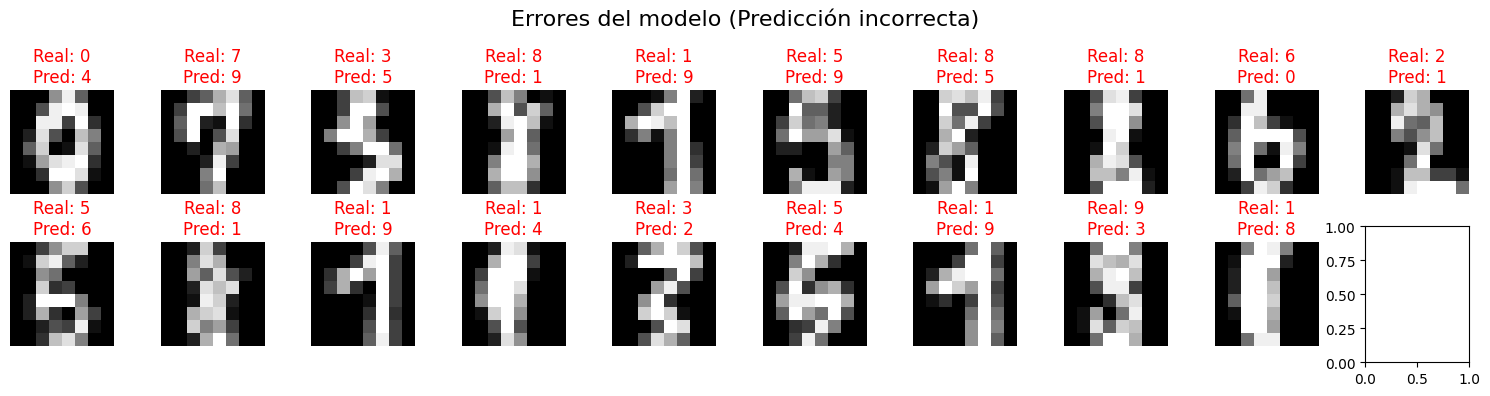

In [11]:
# Código para visualizar solo los errores del modelo:
import numpy as np
import matplotlib.pyplot as plt

# Predecir y convertir a etiquetas
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Identificar los índices donde se cometieron errores
errores_idx = np.where(y_pred_labels != y_true_labels)[0]

# Mostrar hasta 20 errores
n_errores_a_mostrar = min(20, len(errores_idx))
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
fig.suptitle('Errores del modelo (Predicción incorrecta)', fontsize=16)

# Reconvertimos X_test para visualizar (8x8)
X_test_imgs = X_test.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat[:n_errores_a_mostrar]):
    idx = errores_idx[i]
    ax.imshow(X_test_imgs[idx], cmap='gray')
    ax.set_title(f'Real: {y_true_labels[idx]}\nPred: {y_pred_labels[idx]}', color='red')
    ax.axis('off')

plt.tight_layout()
plt.show()

# ¿Qué verás?
* Una fila de imágenes donde el modelo se equivocó.

* Encima de cada imagen aparecerá:

* * Real: la etiqueta verdadera

* * Pred: lo que la red neuronal predijo

* Todo en rojo para indicar que fue un error